Original post: https://www.kaggle.com/dvasyukova/talkingdata-mobile-user-demographics/brand-and-model-based-benchmarks/comments

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

In [3]:
gatrain = pd.read_csv('../input/gender_age_train.csv')
gatest = pd.read_csv('../input/gender_age_test.csv')
gatrain.head(3)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


In [83]:
gatrain.shape[0] - gatrain.device_id.nunique()

0

In [84]:
gatest.shape[0] - gatest.device_id.nunique()

0

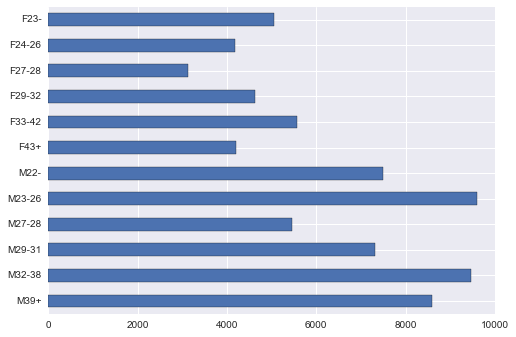

In [11]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='barh')

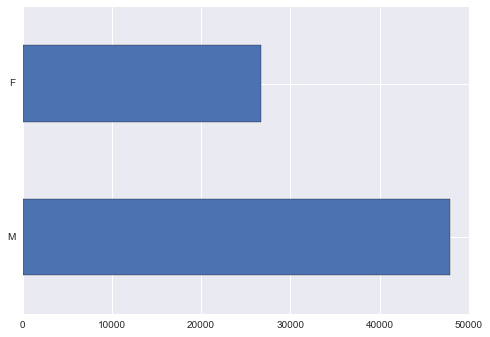

In [12]:
gatrain.gender.value_counts().plot(kind='barh')

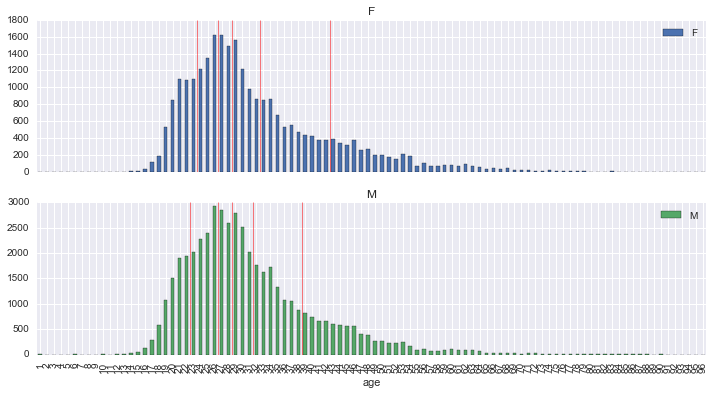

In [25]:
c = gatrain.groupby(['age','gender']).size().unstack().reindex(index=np.arange(gatrain.age.min(), gatrain.age.max()+1)).fillna(0)
ax1, ax2 = c.plot(kind='bar', figsize=(12,6),subplots=True);
ax1.vlines(np.array([23,26,28,32,42])-0.5, 0, 1800, alpha=0.5, linewidth=1, color='r')
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

#### 1/n classes benchmark

In [35]:
letarget = LabelEncoder().fit(gatrain.group.values)
y = letarget.transform(gatrain.group.values)
n_classes = len(letarget.classes_)

In [31]:
pred = np.ones((gatrain.shape[0],n_classes))/n_classes

In [33]:
log_loss(y, pred)

2.4849066497880012

#### Class probabilities benchmark

In [77]:
kf = KFold(gatrain.shape[0], n_folds=10, shuffle=True, random_state=0)
pred = np.zeros((gatrain.shape[0], n_classes))
for itrain, itest in kf:
    train = gatrain.iloc[itrain,:]
    test = gatrain.iloc[itest,:]
    ytrain, ytest = y[itrain], y[itest]
    prob = train.groupby('group').size()/train.shape[0]
    pred[itest,:] = prob.values
print(log_loss(y, pred))

2.42805122275


#### Phone brand and model data

In [78]:
phone = pd.read_csv('../input/phone_brand_device_model.csv',encoding='utf-8')
phone.head(3)

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4


In [82]:
print('{} rows'.format(phone.shape[0]))
print("unique values:")
for c in phone.columns:
    print('{}: {}'.format(c, phone[c].nunique()))

187245 rows
unique values:
device_id: 186716
phone_brand: 131
device_model: 1599


#### Duplicate divide_ids

In [121]:
dup = phone.groupby('device_id').size()
dup = dup[dup>1]
print(dup.shape)
print(dup.value_counts())

(529,)
2    529
dtype: int64


In [122]:
dup = phone.loc[phone.device_id.isin(dup.index)]
first = dup.groupby('device_id').first()
last = dup.groupby('device_id').last()

In [123]:
diff = (first != last).sum(axis=1).nonzero()
pd.concat((first.iloc[diff], last.iloc[diff]),axis=1)

,phone_brand,device_model,phone_brand,device_model
device_id,,,,
-7297178577997113203,华为,荣耀畅玩5X,华为,荣耀3C
-7059081542575379359,LG,Nexus 5,魅族,魅蓝Note 2
-6590454305031525112,小米,MI 3,华为,荣耀6 Plus
-5269721363279128080,三星,Galaxy Core Advance,小米,MI 3
-3004353610608679970,酷派,5891,酷派,7296
5245428108336915020,魅族,MX4,小米,MI One Plus


In [128]:
dev = _.index
print("in train: {}".format(sum(gatrain.device_id.isin(dev))))
print("in test: {}".format(sum(gatest.device_id.isin(dev))))

AttributeError: 'Int64Index' object has no attribute 'index'

In [131]:
brands = train.brand.value_counts().index[:6]
c = train[train.brand.isin(brands)]
g = sns.FacetGrid(c, hue='gender', col='brand',col_wrap=2, aspect=2, xlim=(15,60))
g.map(sns.distplot, 'age', bins=np.arange(15,70)+0.5)

AttributeError: 'DataFrame' object has no attribute 'brand'